## CNN을 활용한 컬러 이미지 인식

In [1]:
import numpy as np
from tensorflow import keras
from matplotlib import pyplot as plt

In [2]:
label_names = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]
cifar = keras.datasets.cifar10
(train_X, train_Y), (test_X, test_Y) = cifar.load_data()

In [3]:
train_X = np.asarray(train_X) / 255.0
test_X = np.asarray(test_X) / 255.0

print(train_X.shape, test_X.shape, train_Y.shape, test_Y.shape)

(50000, 32, 32, 3) (10000, 32, 32, 3) (50000, 1) (10000, 1)


In [7]:
# 모델 구성
model = keras.Sequential([
    keras.layers.Conv2D(32 ,(3,3)),
    keras.layers.BatchNormalization(),
    keras.layers.ReLU(),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Conv2D(64 ,(3,3)),
    keras.layers.BatchNormalization(),
    keras.layers.ReLU(),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Conv2D(64, (3,3)),
    keras.layers.BatchNormalization(),
    keras.layers.ReLU(),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(rate = 0.5),
    keras.layers.Dense(10, activation='softmax')
])

# 모델 컴파일
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 모델 학습
early_stop = keras.callbacks.EarlyStopping(monitor = 'val_loss', patience = 10)
history = model.fit(train_X, train_Y, epochs = 100, validation_data = (test_X, test_Y), callbacks = [early_stop])

Epoch 1/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 23s 14ms/step - accuracy: 0.4667 - loss: 1.4961 - val_accuracy: 0.5349 - val_loss: 1.2802
Epoch 2/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 13ms/step - accuracy: 0.5958 - loss: 1.1468 - val_accuracy: 0.5757 - val_loss: 1.3168
Epoch 3/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 22s 14ms/step - accuracy: 0.6536 - loss: 1.0052 - val_accuracy: 0.6305 - val_loss: 1.0883
Epoch 4/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 13ms/step - accuracy: 0.6858 - loss: 0.9151 - val_accuracy: 0.6395 - val_loss: 1.0756
Epoch 5/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 13ms/step - accuracy: 0.7128 - loss: 0.8385 - val_accuracy: 0.5437 - val_loss: 1.4639
Epoch 6/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 14ms/step - accuracy: 0.7343 - loss: 0.7840 - val_accuracy: 0.6261 - val_loss: 1.1015
Epoch 7/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.7469 - loss: 0.7363 - val_accuracy: 0.6836 - val_loss: 0.9705
Epoch 8/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 13ms/step - accuracy: 

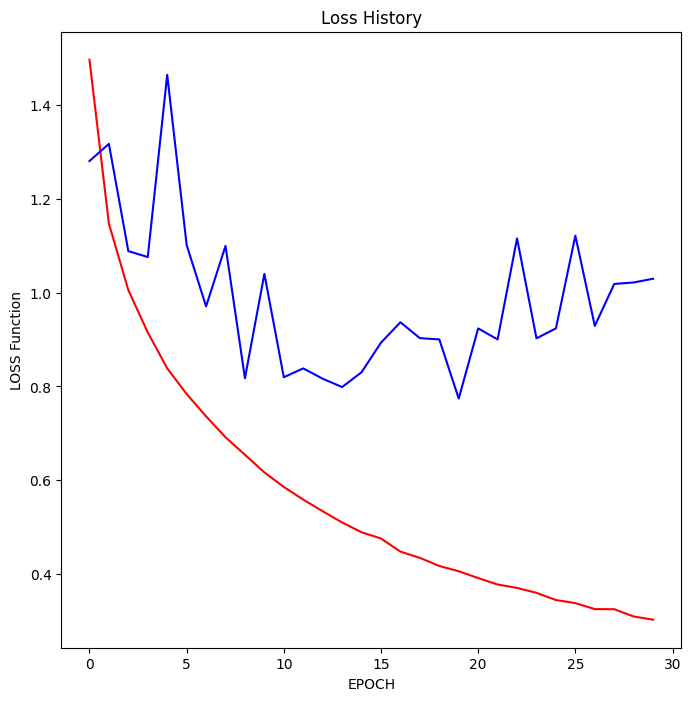

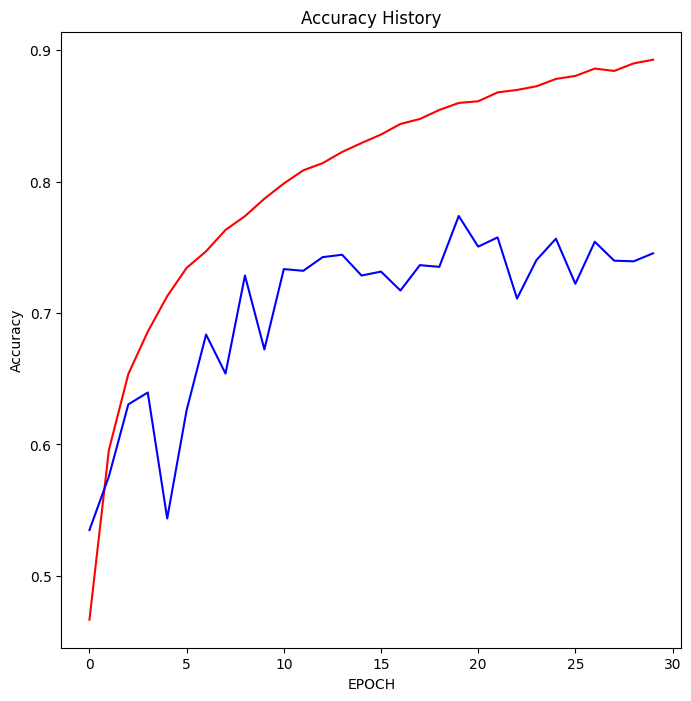

In [8]:
# 정확도 그래프
train_history = history.history["loss"]
validation_history = history.history["val_loss"]
fig = plt.figure(figsize=(8, 8))
plt.title("Loss History")
plt.xlabel("EPOCH")
plt.ylabel("LOSS Function")
plt.plot(train_history, "red")
plt.plot(validation_history, 'blue')
fig.savefig("train_history.png")

train_history = history.history["accuracy"]
validation_history = history.history["val_accuracy"]
fig = plt.figure(figsize=(8, 8))
plt.title("Accuracy History")
plt.xlabel("EPOCH")
plt.ylabel("Accuracy")
plt.plot(train_history, "red")
plt.plot(validation_history, 'blue')
fig.savefig("accuracy_history.png")